In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import torch
# read data from text files
sample=pd.read_csv('/content/drive/My Drive/Data/Sentiment Data/sampleSubmission.csv')
train = pd.read_csv("/content/drive/My Drive/Data/Sentiment Data/train.tsv", delimiter='\t')
test = pd.read_csv("/content/drive/My Drive/Data/Sentiment Data/test.tsv", delimiter='\t')


In [0]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [0]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [0]:
class_count = train['Sentiment'].value_counts()
class_count

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Number of reviews ')

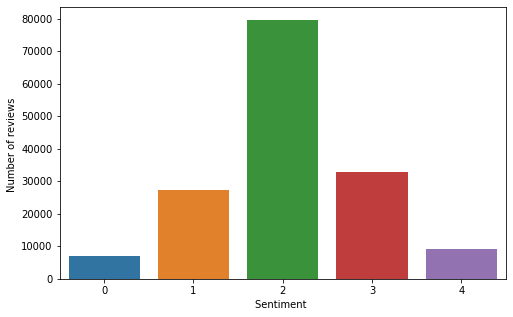

In [0]:
import seaborn as sns
x = np.array(class_count.index)
y = np.array(class_count.values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')

In [0]:
print('Number of sentences in training set:',len(train['SentenceId'].unique()))
print('Number of sentences in test set:',len(test['SentenceId'].unique()))
print('Average words per sentence in train:',train.groupby('SentenceId')['Phrase'].count().mean())
print('Average words per sentence in test:',test.groupby('SentenceId')['Phrase'].count().mean())



Number of sentences in training set: 8529
Number of sentences in test set: 3310
Average words per sentence in train: 18.297572986282095
Average words per sentence in test: 20.027794561933536


Using Word Clouds to see the higher fequency words from each sentiment

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

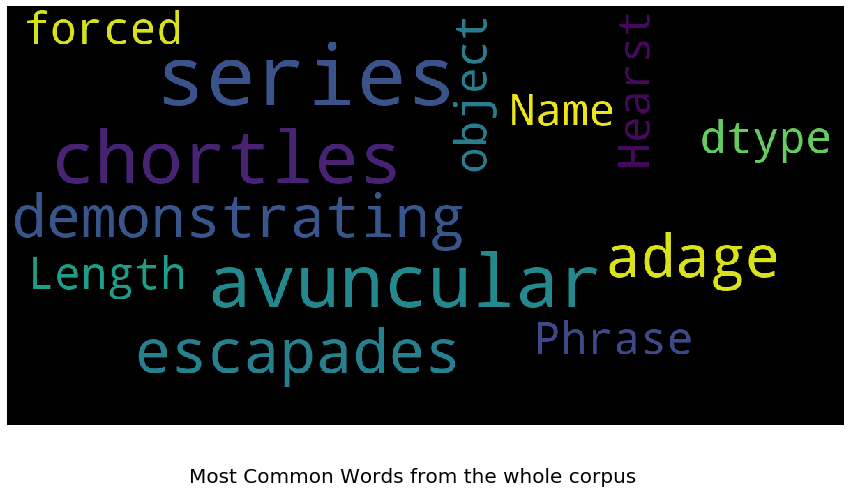

In [0]:
show_wordcloud(train['Phrase'],'Most Common Words from the whole corpus')

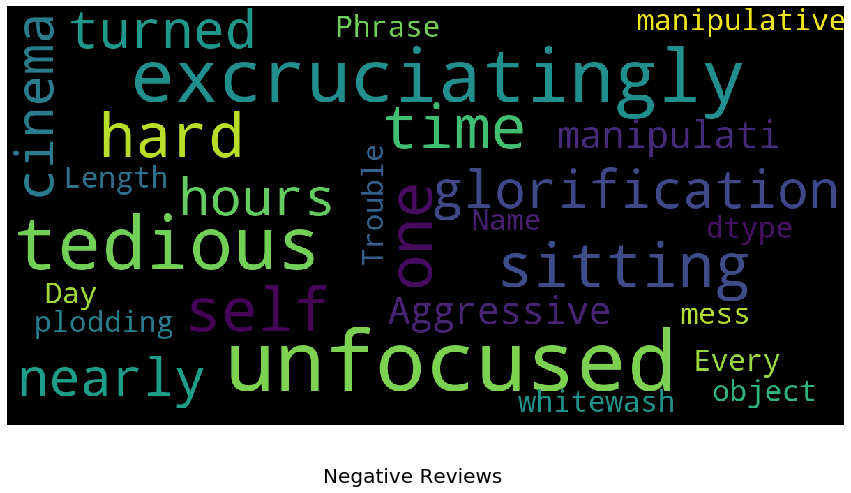

In [0]:
show_wordcloud(train[train['Sentiment'] == 0]['Phrase'],'Negative Reviews')

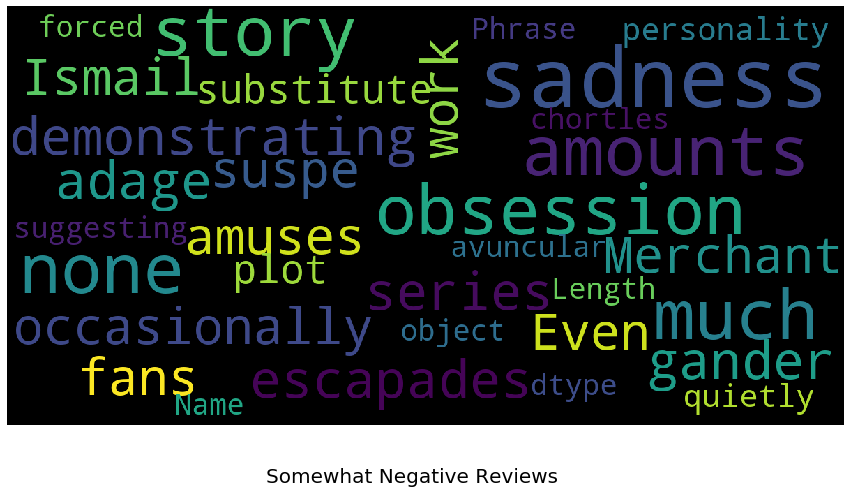

In [0]:
show_wordcloud(train[train['Sentiment'] == 1]['Phrase'],'Somewhat Negative Reviews')

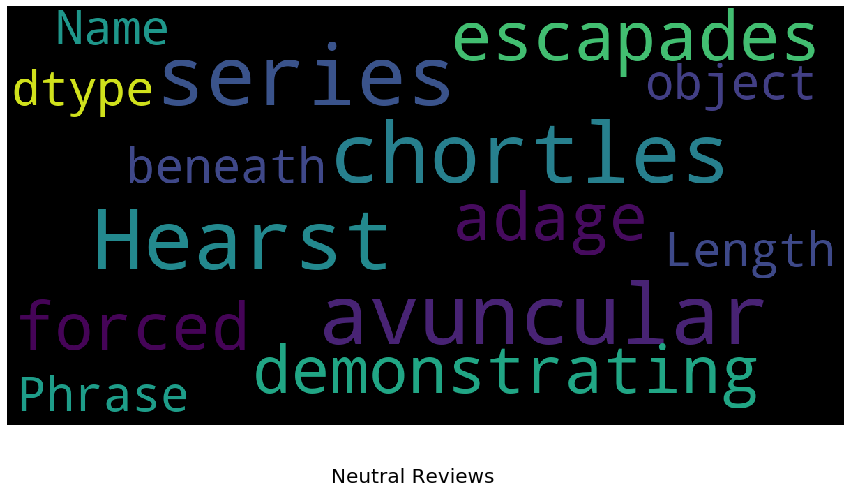

In [0]:
show_wordcloud(train[train['Sentiment'] == 2]['Phrase'],'Neutral Reviews')

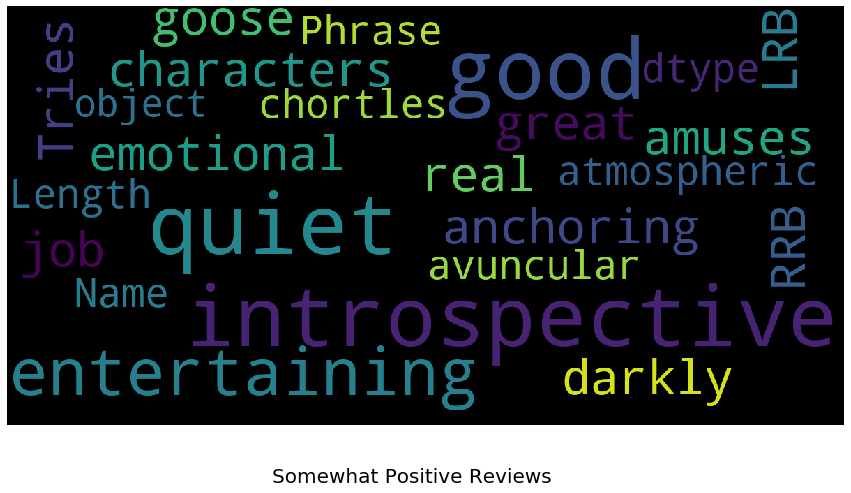

In [0]:


show_wordcloud(train[train['Sentiment'] == 3]['Phrase'],'Somewhat Positive Reviews')



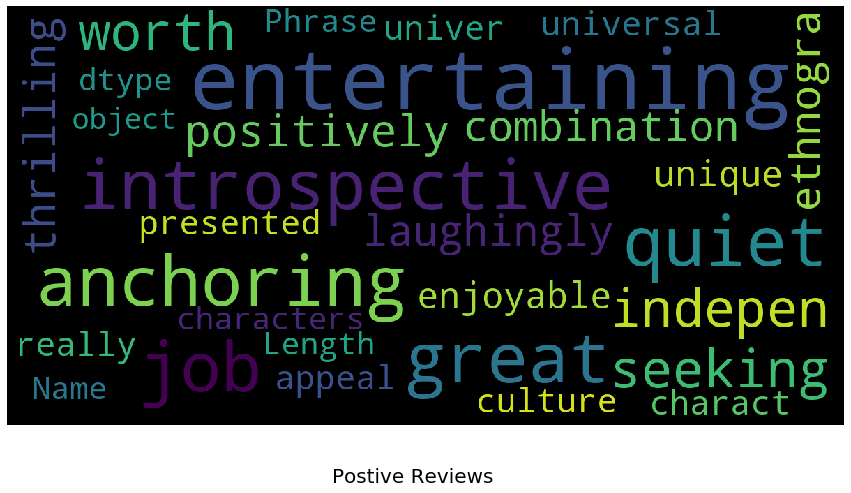

In [0]:
show_wordcloud(train[train['Sentiment'] == 4]['Phrase'],'Postive Reviews')

Different Machine Learning Models 
N-Grams

In [0]:
 from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = TweetTokenizer()

Using TensorFlow backend.


In [0]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=None)
full_text = list(train['Phrase'].values) + list(test['Phrase'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train['Phrase'])
test_vectorized = vectorizer.transform(test['Phrase'])

In [0]:
y = train['Sentiment']

In [0]:
from sklearn.model_selection import train_test_split
x_train , x_val, y_train , y_val = train_test_split(train_vectorized,y,test_size = 0.2)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier

In [0]:


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



In [0]:
# lr = LogisticRegression()
# ovr = OneVsRestClassifier(lr)
# ovr.fit(x_train,y_train)
# print(classification_report( ovr.predict(x_val) , y_val))
# print(accuracy_score( ovr.predict(x_val) , y_val ))


In [0]:


svm = LinearSVC()
svm.fit(x_train,y_train)
print(classification_report( svm.predict(x_val) , y_val))
print(accuracy_score( svm.predict(x_val) , y_val ))



              precision    recall  f1-score   support

           0       0.39      0.49      0.43      1110
           1       0.51      0.55      0.53      5021
           2       0.81      0.73      0.77     17588
           3       0.52      0.57      0.55      6016
           4       0.41      0.52      0.46      1477

    accuracy                           0.65     31212
   macro avg       0.53      0.57      0.55     31212
weighted avg       0.67      0.65      0.66     31212

0.6526976803793413


In [0]:
estimators = [ ('svm',svm) , ('ovr' , ovr) ]
clf = VotingClassifier(estimators , voting='hard')
clf.fit(x_train,y_train)
print(classification_report( clf.predict(x_val) , y_val))
print(accuracy_score( clf.predict(x_val) , y_val ))

NameError: ignored

In [0]:
from keras.utils import to_categorical
target=train.Sentiment.values
y=to_categorical(target)
y

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [0]:
max_features = 13000
max_words = 50
batch_size = 128
epochs = 3
num_classes=5

In [0]:
from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(train['Phrase'],y,test_size = 0.20)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM,Embedding
from keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [0]:


X_test = tokenizer.texts_to_sequences(test['Phrase'])
X_test =pad_sequences(X_test, maxlen=max_words)



In [0]:


X_train =pad_sequences(X_train, maxlen=max_words)
X_val = pad_sequences(X_val, maxlen=max_words)
X_test =pad_sequences(X_test, maxlen=max_words)



In [0]:
model_GRU=Sequential()
model_GRU.add(Embedding(max_features,100,mask_zero=True))
model_GRU.add(GRU(64,dropout=0.4,return_sequences=True))
model_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
model_GRU.add(Dense(num_classes,activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy',optimizer=Adam(lr = 0.001),metrics=['accuracy'])
model_GRU.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1300000   
_________________________________________________________________
gru_1 (GRU)                  (None, None, 64)          31680     
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                9312      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 1,341,157
Trainable params: 1,341,157
Non-trainable params: 0
_________________________________________________________________


In [0]:


%%time
history1=model_GRU.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)






Train on 124848 samples, validate on 31212 samples
Epoch 1/3





124848/124848 [==============================] - 235s 2ms/step - loss: 1.0433 - acc: 0.5892 - val_loss: 0.8802 - val_acc: 0.6515
Epoch 2/3
124848/124848 [==============================] - 220s 2ms/step - loss: 0.8348 - acc: 0.6627 - val_loss: 0.8422 - val_acc: 0.6629
Epoch 3/3
124848/124848 [==============================] - 219s 2ms/step - loss: 0.7782 - acc: 0.6835 - val_loss: 0.8268 - val_acc: 0.6699
CPU times: user 15min 33s, sys: 1min 21s, total: 16min 55s
Wall time: 11min 16s


In [0]:
# y_pred1=model_GRU.predict_classes(X_test, verbose=1)
# sub.Sentiment=y_pred1
# sub.to_csv('sub1_GRU.csv',index=False)
# sub.head()

In [0]:
model3_LSTM=Sequential()
model3_LSTM.add(Embedding(max_features,100,mask_zero=True))
model3_LSTM.add(LSTM(64,dropout=0.4,return_sequences=True))
model3_LSTM.add(LSTM(32,dropout=0.5,return_sequences=False))
model3_LSTM.add(Dense(num_classes,activation='sigmoid'))
model3_LSTM.compile(loss='binary_crossentropy',optimizer=Adam(lr = 0.001),metrics=['accuracy'])
model3_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1300000   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          42240     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 1,354,821
Trainable params: 1,354,821
Non-trainable params: 0
_________________________________________________________________


In [0]:
%%time
history3=model3_LSTM.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Train on 124848 samples, validate on 31212 samples
Epoch 1/3
124848/124848 [==============================] - 289s 2ms/step - loss: 0.4081 - acc: 0.8368 - val_loss: 0.3593 - val_acc: 0.8525
Epoch 2/3
124848/124848 [==============================] - 288s 2ms/step - loss: 0.3306 - acc: 0.8564 - val_loss: 0.3128 - val_acc: 0.8598
Epoch 3/3
124848/124848 [==============================] - 290s 2ms/step - loss: 0.2871 - acc: 0.8702 - val_loss: 0.3011 - val_acc: 0.8665
CPU times: user 20min 21s, sys: 1min 43s, total: 22min 5s
Wall time: 14min 28s


In [0]:
y_pred3=model3_LSTM.predict_classes(X_test, verbose=1)



66292/66292 [==============================] - 146s 2ms/step


NameError: ignored

In [0]:
model5_CNN= Sequential()
model5_CNN.add(Embedding(max_features,100,input_length=max_words))
model5_CNN.add(Dropout(0.2))
model5_CNN.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model5_CNN.add(GlobalMaxPooling1D())
model5_CNN.add(Dense(128,activation='relu'))
model5_CNN.add(Dropout(0.2))
model5_CNN.add(Dense(num_classes,activation='sigmoid'))
model5_CNN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model5_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 100)           1300000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 64)            19264     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                

In [0]:


%%time
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

history5=model5_CNN.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=3, batch_size=batch_size, verbose=1,callbacks = [early_stop])



Train on 124848 samples, validate on 31212 samples
Epoch 1/3
124848/124848 [==============================] - 11s 91us/step - loss: 0.3489 - acc: 0.8456 - val_loss: 0.3073 - val_acc: 0.8622
Epoch 2/3
124848/124848 [==============================] - 10s 77us/step - loss: 0.2853 - acc: 0.8707 - val_loss: 0.2904 - val_acc: 0.8671
Epoch 3/3
124848/124848 [==============================] - 10s 77us/step - loss: 0.2614 - acc: 0.8818 - val_loss: 0.2909 - val_acc: 0.8683
CPU times: user 31.2 s, sys: 5.85 s, total: 37 s
Wall time: 31 s


In [0]:
y_pred5=model5_CNN.predict_classes(X_test, verbose=1)
y_pred5

66292/66292 [==============================] - 3s 44us/step


array([2, 2, 2, ..., 1, 1, 1])